# 1-2. Dataset and Preprocessing
# 1-2. A Dataloading

Connect to google drive for get pre uploded data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We use Attached file and SemEval2010_task8_testing_keys/TEST_FILE_FULL.TXT based on paper.

In [2]:
with open("/content/drive/MyDrive/SemEval2010_task8_all_data/SemEval2010_task8_training/TRAIN_FILE.TXT") as f:
    train_file = f.readlines()

with open("/content/drive/MyDrive/SemEval2010_task8_all_data/SemEval2010_task8_testing_keys/TEST_FILE_FULL.TXT") as f:
    test_file = f.readlines()



In [3]:
def prepare_dataset(raw):
    sentences, relations = [], []
    to_replace = [("\"", ""), ("\n", ""), ("<", " <"), (">", "> ")]
    last_was_sentence = False
    for line in raw:
        sl = line.split("\t")
        if last_was_sentence:
            relations.append(sl[0].split("(")[0].replace("\n", ""))
            last_was_sentence = False
        if sl[0].isdigit():
            sent = sl[1]
            for rp in to_replace:
                sent = sent.replace(rp[0], rp[1])
            sentences.append(sent)
            last_was_sentence = True
    print("Found {} sentences".format(len(sentences)))
    return sentences, relations


def Labeler(relations):
    Label=[]
    for i in relations:
        if i=='Entity-Destination':
            Label.append(0)
        if i=='Entity-Origin':
            Label.append(1)
        if i=='Component-Whole':
            Label.append(2)
        if i=='Member-Collection':
            Label.append(3)
        if i=='Other':
            Label.append(4)
        if i=='Message-Topic':
            Label.append(5)
        if i=='Content-Container':
            Label.append(6)
        if i=='Instrument-Agency':
            Label.append(7)
        if i=='Product-Producer':
            Label.append(8)
        if i=='Cause-Effect':
            Label.append(9)
    return Label

In [4]:
train_sentences, train_relations = prepare_dataset(train_file)
test_sentences, test_relations = prepare_dataset(test_file)

train_label = Labeler(train_relations)
test_label = Labeler(test_relations)

Found 8000 sentences
Found 2717 sentences


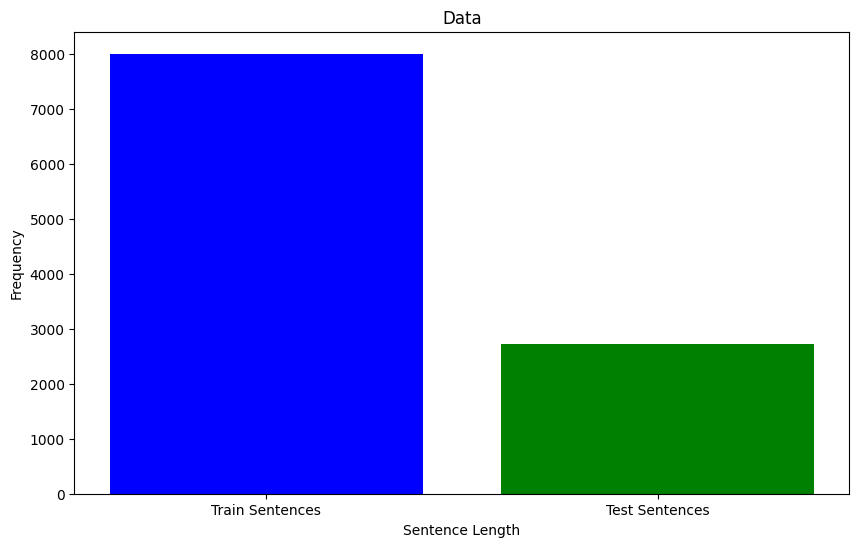

In [5]:
import matplotlib.pyplot as plt

# Plotting the distribution of sentence lengths
plt.figure(figsize=(10, 6))

plt.bar(['Train Sentences', 'Test Sentences'], [len(train_sentences), len(test_sentences)], color=['blue', 'green'])

plt.title('Data')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')

plt.show()


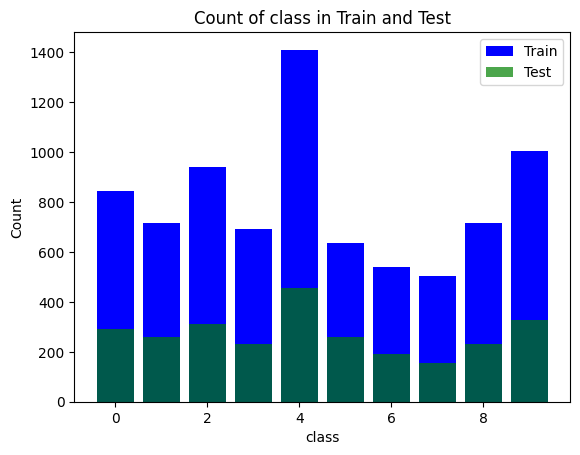

In [6]:
import matplotlib.pyplot as plt
from collections import Counter

# Count occurrences of each integer in train_label and test_label
train_counts = Counter(train_label)
test_counts = Counter(test_label)

# Get unique integers and their counts
train_values, train_counts = zip(*train_counts.items())
test_values, test_counts = zip(*test_counts.items())

# Create bar plots for train_label and test_label
plt.bar(train_values, train_counts, color='blue', label='Train')
plt.bar(test_values, test_counts, color='green', label='Test', alpha=0.7)  # Use alpha to make bars semi-transparent

# Set labels and title
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Count of class in Train and Test')

# Add legend
plt.legend()


# Show the plot
plt.show()


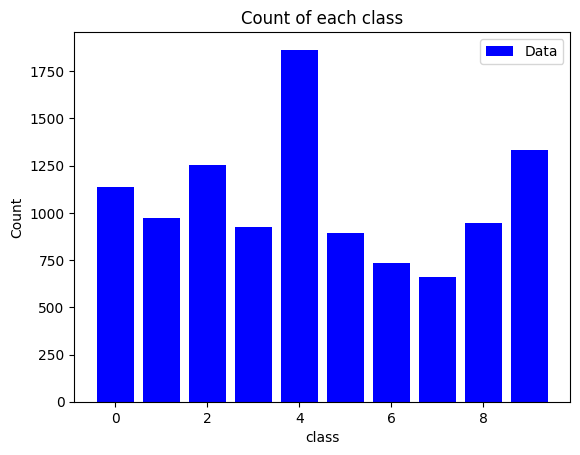

In [23]:
all_label = train_label + test_label

counts = Counter(all_label)

# Get unique integers and their counts
label_values, label_counts = zip(*counts.items())


# Create bar plots for all_label
plt.bar(label_values, label_counts, color='blue', label='Data')

# Set labels and title
plt.xlabel('class')
plt.ylabel('Count')
plt.title('Count of each class')

# Add legend
plt.legend()

# Show the plot
plt.show()

# 1-2. B Data Processing

Show sample sentence of test data.

In [8]:
print(test_sentences[0])

The most common  <e1> audits </e1>  were about  <e2> waste </e2>  and recycling.


In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create a tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the training sentences
tokenizer.fit_on_texts(train_sentences)

# Fit the tokenizer on the testing sentences
tokenizer.fit_on_texts(test_sentences)


# Convert training and test sentences to sequences of tokens
train_sequences = tokenizer.texts_to_sequences(train_sentences)
test_sequences = tokenizer.texts_to_sequences(test_sentences)

# Get the word index mapping
word_index = tokenizer.word_index

# Pad sequences to the same length
max_length = max(max(len(seq) for seq in train_sequences), max(len(seq) for seq in test_sequences))
padded_train_sequences = pad_sequences(train_sequences, maxlen=max_length, padding='post')
padded_test_sequences = pad_sequences(test_sequences, maxlen=max_length, padding='post')

# Print the results
print("Word Index:")
print(word_index)

print("Word Index Size:")
print(len(word_index))

print("\nTraining Sequences:")
print(train_sequences)

print("\nPadded Training Sequences:")
print(padded_train_sequences)

print("\nTest Sequences:")
print(test_sequences)

print("\nPadded Test Sequences:")
print(padded_test_sequences)

print()

Word Index:
{'e1': 1, 'e2': 2, 'the': 3, 'of': 4, 'a': 5, 'and': 6, 'in': 7, 'to': 8, 'is': 9, 'was': 10, 'from': 11, 'by': 12, 'with': 13, 'on': 14, 'that': 15, 'into': 16, 'for': 17, 'an': 18, 'as': 19, 'this': 20, 'are': 21, 'has': 22, 'it': 23, 'his': 24, 'have': 25, 'at': 26, 'caused': 27, 'or': 28, 'which': 29, 'been': 30, 'were': 31, 'i': 32, 'he': 33, 'their': 34, 'one': 35, 'had': 36, 'who': 37, 'we': 38, 'they': 39, 'my': 40, 'out': 41, 'after': 42, 'made': 43, 'when': 44, 'up': 45, 'but': 46, 'its': 47, 'all': 48, 'other': 49, 'her': 50, 'inside': 51, 'new': 52, 'about': 53, 'two': 54, 'be': 55, 'first': 56, 'some': 57, 'over': 58, 'also': 59, 'more': 60, 'water': 61, 'through': 62, 'these': 63, 'not': 64, 'people': 65, 'time': 66, 'used': 67, 'most': 68, 'book': 69, 'years': 70, 'many': 71, 'so': 72, 'put': 73, 'like': 74, 'there': 75, 'using': 76, 'our': 77, 'than': 78, 'them': 79, 'only': 80, 'you': 81, "'s": 82, 'small': 83, 'part': 84, 'such': 85, 'three': 86, 'company'

We count the length of train and test data for evaluuate padding process.

In [10]:
# Count lengths of padded sequences
train_lengths = Counter(len(seq) for seq in padded_train_sequences)
test_lengths = Counter(len(seq) for seq in padded_test_sequences)

print("Count of Lengths in Training Sequences:")
print(train_lengths)

print("Count of Lengths in Test Sequences:")
print(test_lengths)


Count of Lengths in Training Sequences:
Counter({89: 8000})
Count of Lengths in Test Sequences:
Counter({89: 2717})


because in the Labeler function we manually map string labels to integer we have 10 number but we compute this number again in below code.

In [11]:
num_classes = max(max(train_label), max(test_label)) + 1
print(num_classes)

10


convert integer labels to one hot enconding

In [12]:
from tensorflow.keras.utils import to_categorical

# Convert train and test labels to one-hot encoding
class_number = 10
one_hot_train_labels = to_categorical(train_label, num_classes=class_number)
one_hot_test_labels = to_categorical(test_label, num_classes=class_number)

# Print the results
print("Original Train Labels:")
print(train_label)

print("\nOne-Hot Encoded Train Labels:")
print(one_hot_train_labels)

print("\nOriginal Test Labels:")
print(test_label)

print("\nOne-Hot Encoded Test Labels:")
print(one_hot_test_labels)

Original Train Labels:
[2, 4, 7, 4, 3, 4, 9, 0, 6, 0, 3, 4, 5, 9, 7, 5, 7, 8, 2, 3, 1, 3, 9, 4, 3, 4, 9, 5, 5, 2, 5, 9, 8, 0, 2, 1, 4, 2, 9, 7, 9, 6, 3, 1, 9, 7, 7, 9, 4, 4, 9, 2, 9, 9, 3, 5, 4, 5, 6, 4, 0, 6, 3, 0, 4, 4, 1, 5, 0, 1, 9, 3, 9, 0, 1, 9, 5, 8, 9, 9, 7, 3, 9, 3, 8, 4, 0, 9, 9, 4, 1, 2, 1, 7, 1, 7, 9, 3, 9, 9, 4, 0, 9, 7, 9, 6, 2, 7, 0, 6, 6, 1, 5, 1, 8, 4, 9, 4, 2, 3, 4, 1, 0, 5, 5, 7, 3, 0, 9, 0, 1, 2, 8, 8, 3, 4, 1, 4, 9, 4, 4, 4, 3, 1, 9, 3, 3, 0, 4, 6, 1, 9, 5, 0, 8, 0, 1, 8, 5, 5, 2, 1, 7, 2, 9, 9, 6, 1, 3, 5, 9, 2, 7, 1, 1, 2, 6, 0, 4, 5, 9, 2, 4, 4, 8, 2, 4, 4, 9, 6, 2, 0, 8, 0, 3, 2, 1, 9, 8, 3, 7, 1, 9, 4, 6, 9, 3, 8, 0, 0, 4, 2, 3, 2, 9, 1, 1, 8, 5, 7, 4, 3, 9, 4, 4, 2, 2, 7, 3, 0, 6, 2, 0, 1, 5, 8, 4, 7, 0, 6, 5, 4, 3, 4, 6, 0, 4, 6, 5, 4, 5, 3, 0, 7, 5, 3, 0, 0, 2, 7, 3, 0, 2, 5, 4, 4, 6, 6, 9, 5, 3, 2, 8, 4, 9, 4, 0, 1, 4, 0, 4, 0, 9, 4, 0, 9, 7, 4, 6, 3, 0, 0, 4, 4, 6, 9, 6, 2, 0, 0, 4, 1, 2, 6, 0, 7, 2, 6, 2, 5, 1, 6, 3, 5, 2, 8, 8, 1, 0, 9, 1, 5, 0, 2, 2, 1

In [13]:
max_length

89

# 1-3. Train Model

In [14]:
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Conv1D, MaxPooling1D, Flatten, Dense

# Model Definition
model = Sequential()

# Embedding Layer
model.add(Embedding(input_dim=(len(word_index)+1), output_dim=50, input_length=max_length))

# Bidirectional LSTM
model.add(Bidirectional(LSTM(50, return_sequences=True)))

# Convolutional Layers
model.add(Conv1D(200, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

# Output Layer
# Assuming you have n_classes for the number of relation classes
model.add(Dense(class_number, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 89, 50)            1145050   
                                                                 
 bidirectional (Bidirection  (None, 89, 100)           40400     
 al)                                                             
                                                                 
 conv1d (Conv1D)             (None, 87, 200)           60200     
                                                                 
 max_pooling1d (MaxPooling1  (None, 43, 200)           0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8600)              0         
                                                                 
 dense (Dense)               (None, 10)                8

In [16]:
train_history = model.fit(padded_train_sequences, one_hot_train_labels, epochs=20, batch_size=32, validation_split=0.1)

Epoch 1/20
225/225 [==============================] - 34s 150ms/step - loss: 0.2611 - accuracy: 0.9369 - val_loss: 1.2720 - val_accuracy: 0.6706
Epoch 2/20
225/225 [==============================] - 33s 146ms/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 1.7789 - val_accuracy: 0.6956
Epoch 3/20
225/225 [==============================] - 32s 142ms/step - loss: 0.0034 - accuracy: 0.9996 - val_loss: 2.2718 - val_accuracy: 0.6950
Epoch 4/20
225/225 [==============================] - 33s 146ms/step - loss: 0.0060 - accuracy: 0.9996 - val_loss: 2.0003 - val_accuracy: 0.6919
Epoch 5/20
225/225 [==============================] - 31s 136ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 2.0879 - val_accuracy: 0.6888
Epoch 6/20
225/225 [==============================] - 31s 137ms/step - loss: 3.2250e-04 - accuracy: 1.0000 - val_loss: 2.2725 - val_accuracy: 0.6894
Epoch 7/20
225/225 [==============================] - 30s 132ms/step - loss: 1.7616e-04 - accuracy: 1.0000 - val_loss: 2.3090 

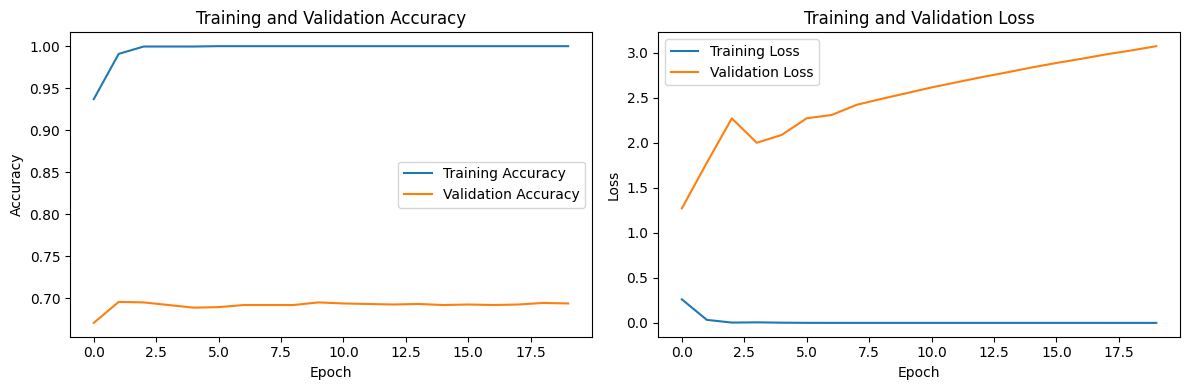

In [17]:
# Plotting accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_history.history['accuracy'], label='Training Accuracy')
plt.plot(train_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(train_history.history['loss'], label='Training Loss')
plt.plot(train_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
print(padded_test_sequences.shape)
print(padded_train_sequences.shape)

(2717, 89)
(8000, 89)


# 1-4. Evaluation And Analysis Results

In [19]:
y_pred = model.predict(padded_test_sequences)


85/85 [==============================] - 4s 41ms/step


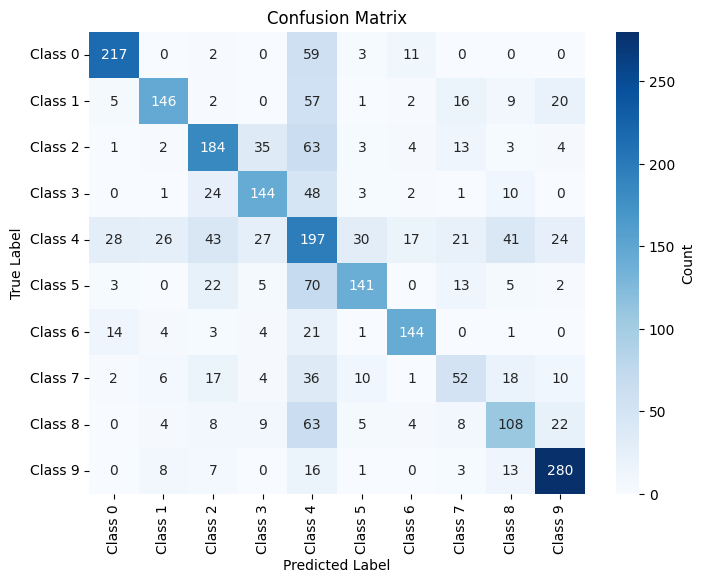

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

conf_matrix_plt_labels = [f'Class {i}' for i in range(10)]

# Calculate the confusion matrix
conf_matrix = confusion_matrix(test_label, np.argmax(y_pred, axis=1))

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=conf_matrix_plt_labels,
            yticklabels=conf_matrix_plt_labels,  # Replace with your class labels
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [22]:
from sklearn.metrics import classification_report

classification_rep = classification_report(test_label, np.argmax(y_pred, axis=1), target_names=conf_matrix_plt_labels)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.80      0.74      0.77       292
     Class 1       0.74      0.57      0.64       258
     Class 2       0.59      0.59      0.59       312
     Class 3       0.63      0.62      0.62       233
     Class 4       0.31      0.43      0.36       454
     Class 5       0.71      0.54      0.61       261
     Class 6       0.78      0.75      0.76       192
     Class 7       0.41      0.33      0.37       156
     Class 8       0.52      0.47      0.49       231
     Class 9       0.77      0.85      0.81       328

    accuracy                           0.59      2717
   macro avg       0.63      0.59      0.60      2717
weighted avg       0.62      0.59      0.60      2717

